# 02 Data Transformation

Importing libraries

In [1]:
import pandas as pd
import numpy as np

import yaml

Reading files.

In [2]:
try:
    with open('../params.yml','r') as file:
        config = yaml.safe_load(file)  
except Exception as e:
    print('Error reading the config file')

In [3]:
config

{'raw_data_1': '../01_data/PDB_31-07-2011.csv',
 'raw_data_2': '../01_data/PDB_31-12-2012.csv',
 'data': '../01_data/data.csv',
 'new_data': '../01_data/new_data.csv',
 'x': '../01_data/x.csv',
 'x_tr': '../01_data/x_tr.csv',
 'y': '../01_data/y.csv',
 'xy': '../01_data/xy.csv',
 'x_sum_np': '../01_data/x_sum_np.csv',
 'clean_data': '../01_data/clean_data.csv',
 'x_sum': '../01_data/x_sum.csv'}

In [40]:
data = pd.read_csv(config['data'])
data

,pdb_id,seq,sst3,sst8
0,12asA,AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLS...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCCEEECCCCCCCCCC...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSCCTT...
1,16vpA,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,CCCCCCCCCCCHHHHHHHHHHHHCCCCHHHHHHHHHHCCCCCCCCC...,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...
2,1914A,MVLLESEQFLTELTRLFQKCRSSGSVFITLKKYDEGLEPAENKCLL...,CCEECHHHHHHHHHHHHHHCCCCCCEEEEEEEECCCCCCCCCEEEE...,CCEECHHHHHHHHHHHHHHTSSSCCEEEEEEEECCCCCCCCCEEEE...
3,1a0iA,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,CCCCCCCEEEEECCHHHHHHHHHHHCCEEEEECCCCEEEEEEEECC...,CTTCCCCEEEEECCHHHHHHHHHHHSSEEEEECCCSEEEEEEEETT...
4,1a0pA,QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...,CHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHHHHHHCCCCCC...,CHHHHHHHHHHHHHHTTCSCHHHHHHHHHHHHHHHHHHHHTSCCTT...
...,...,...,...,...
21087,4hyoA,VPATRILLLVLAVIIYGTAGFHFIEGESWTVSLYWTFVTIATVGYG...,CCHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCC...,CCHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHTTCCCC...
21088,4i4aA,XXNIIRKXDWDSXVHEYDLDGSRLLPWEGLNTPFGGAWCIVRPETK...,CCCCEECCCHHHCEEECCEEEEECCCCCCCCCCCEEEEEEECCCEE...,CCCSEECCCGGGCEEETTEEEEECCCCTTCCCSSEEEEEEECTTEE...
21089,4i62A,IEAIKSKGKLVVALNPDFAPFEYQKVVDGKNQIVGSDIELAKAIAT...,CHHHHHHCEEEEEECCCECCCEEEEEECCEEEEECHHHHHHHHHHH...,CHHHHHHTEEEEEECSCBTTTBEEEEETTEEEEESHHHHHHHHHHH...
21090,4i8eX,RAVTESAPNVEYHDVKGDMIQSVTTSFDDTSRLLTWTINLTPRQVK...,CCEEEECCEEEEECCCCCCEEEEEEEEECCCCEEEEEEEECCCCCC...,CCEEEECCEEEEECTTCCCEEEEEEEEETTTTEEEEEEEECCSCCC...


In [41]:
new_data = pd.read_csv(config['new_data'])
new_data

,AA-2i,AA-i,AA,AA+i,AA+2,y3,y8
0,A,Y,I,A,K,H,H
1,Y,I,A,K,Q,H,H
2,I,A,K,Q,R,H,H
3,A,K,Q,R,Q,H,H
4,K,Q,R,Q,I,H,H
...,...,...,...,...,...,...,...
5486657,A,T,A,R,R,H,H
5486658,T,A,R,R,Q,H,H
5486659,A,R,R,Q,R,H,H
5486660,R,R,Q,R,L,H,H


In [42]:
x = new_data.iloc[:,:5]
y3 = new_data['y3']
y8 = new_data['y8']
x.head()

,AA-2i,AA-i,AA,AA+i,AA+2
0,A,Y,I,A,K
1,Y,I,A,K,Q
2,I,A,K,Q,R
3,A,K,Q,R,Q
4,K,Q,R,Q,I


### Outliers

We will not remove outliers.

### Transformers & Scalers

In [24]:
#%%writefile -a functions.py

import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_countplot(df, column_list):
    '''Function to plot countplots for categorical dataframe:
    2 columns, n rows (number of columns of dataframe) '''
    
    plt_size = math.ceil(len(column_list)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    col_num = []
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
    
    fig, ax = plt.subplots(plt_size,2, figsize=(20,40))
    
    #orient = orientation
    
    for i in column_list:
        sns.histplot(data = df, x = i, ax = ax[row_num[n],col_num[n]], color='#a1c9f4')    
        n += 1
                      
    plt.show()

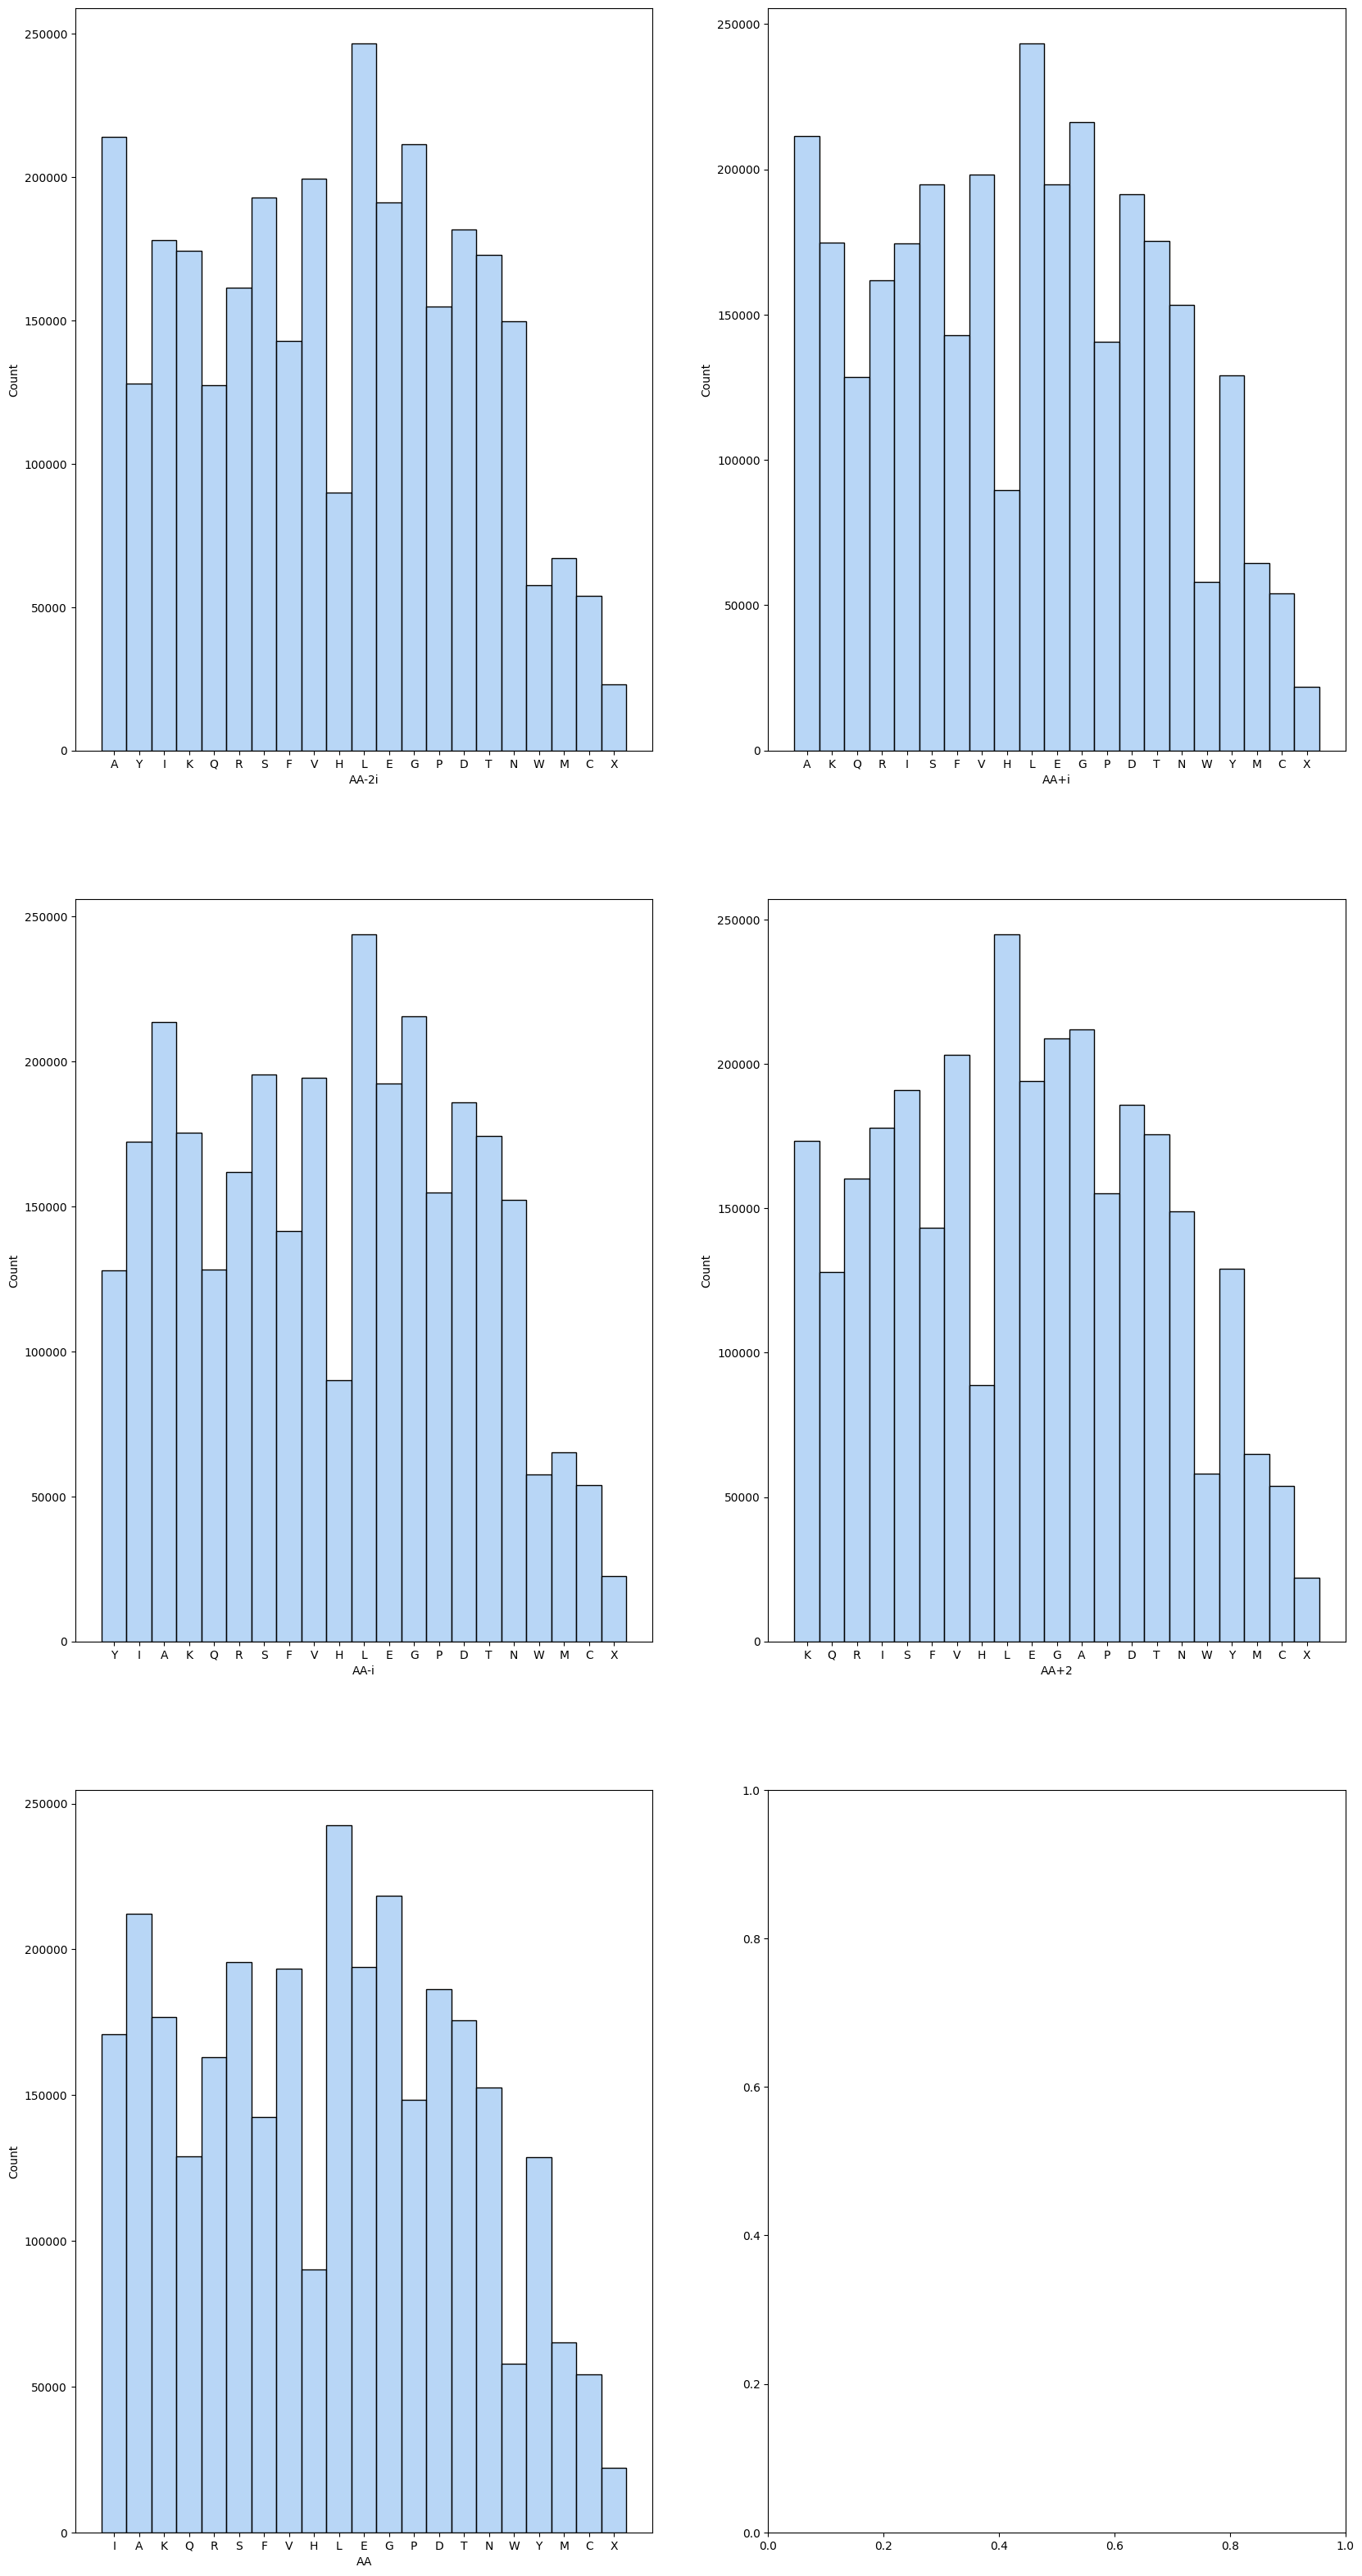

In [31]:
plot_countplot(x,x.columns)

Distribution is not very far from a normal distribution, no transformer will be applied.\
As all columns vary between 0 and 20, there is no need to apply a scaler.